<a href="https://colab.research.google.com/github/NestY73/Algorithms_Data_Analysis/blob/master/task_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы обучения без учителя.
## Методы кластеризации

В этом задании вам необходимо будет применить 3 метода кластеризации к данным.

Для каждого метода будет свой вопрос, ответ на который надо будет передать на портал

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Подготовка данных

Для начала загрузим данные из этой [статьи](https://fivethirtyeight.com/features/weather-forecast-news-app-habits/)

In [16]:
df = pd.read_csv('./weather-check.csv')

In [17]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [18]:
df.shape

(928, 9)

Они представляют из сбея результат небольшого опроса жителей США на тему того, как они проверяют прогноз прогоды. Кроме того в опроснике есть пункты, связанные с соц-дем информацией: возраст, пол, заработок, регион. 

Все признаки, в данном случае, являются категориальными.

Для начала удалим столбец с идентификатором респондентов и столбец с открытым вопросом.

In [19]:
df = df.drop(labels=df.columns[0], axis=1)
df = df.drop(labels=df.columns[2], axis=1)

In [20]:
df.head()

,Do you typically check a daily weather report?,How do you typically check the weather?,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Yes,The default weather app on your phone,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,Yes,The default weather app on your phone,Very likely,18 - 29,Male,Prefer not to answer,-
2,Yes,The default weather app on your phone,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,Yes,The default weather app on your phone,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,Yes,A specific website or app (please provide the ...,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


Далее выполним перекодировку признаков с помощью метода `pd.get_dummies`. 

Конечно, для таких признаков как "заработок" или "регион проживания" можно выполнить более интеллектуальное преобразование (например учитывающее, что ответ "50,000 to  74,999" ближе к "80,000 to 99,999", чем к "150,000 to 174,999"), но для первого подхода мы этого делать не будем.

In [21]:
df_dummy = pd.get_dummies(df)
df_dummy

,Do you typically check a daily weather report?_No,Do you typically check a daily weather report?_Yes,How do you typically check the weather?_-,How do you typically check the weather?_A specific website or app (please provide the answer),How do you typically check the weather?_Internet search,How do you typically check the weather?_Local TV News,How do you typically check the weather?_Newsletter,How do you typically check the weather?_Newspaper,How do you typically check the weather?_Radio weather,How do you typically check the weather?_The Weather Channel,How do you typically check the weather?_The default weather app on your phone,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?_-","If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?_Somewhat likely","If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?_Somewhat unlikely","If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?_Very likely","If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?_Very unlikely",Age_-,Age_18 - 29,Age_30 - 44,Age_45 - 59,Age_60+,What is your gender?_-,What is your gender?_Female,What is your gender?_Male,"How much total combined money did all members of your HOUSEHOLD earn last year?_$0 to $9,999","How much total combined money did all members of your HOUSEHOLD earn last year?_$10,000 to $24,999","How much total combined money did all members of your HOUSEHOLD earn last year?_$100,000 to $124,999","How much total combined money did all members of your HOUSEHOLD earn last year?_$125,000 to $149,999","How much total combined money did all members of your HOUSEHOLD earn last year?_$150,000 to $174,999","How much total combined money did all members of your HOUSEHOLD earn last year?_$175,000 to $199,999","How much total combined money did all members of your HOUSEHOLD earn last year?_$200,000 and up","How much total combined money did all members of your HOUSEHOLD earn last year?_$25,000 to $49,999","How much total combined money did all members of your HOUSEHOLD earn last year?_$50,000 to $74,999","How much total combined money did all members of your HOUSEHOLD earn last year?_$75,000 to $99,999",How much total combined money did all members of your HOUSEHOLD earn last year?_-,How much total combined money did all members of your HOUSEHOLD earn last year?_Prefer not to answer,US Region_-,US Region_East North Central,US Region_East South Central,US Region_Middle Atlantic,US Region_Mountain,US Region_New England,US Region_Pacific,US Region_South Atlantic,US Region_West North Central,US Region_West South Central
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
924,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
925,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
926,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0

In [39]:
df_dummy.columns


Index(['Do you typically check a daily weather report?_No',
       'Do you typically check a daily weather report?_Yes',
       'How do you typically check the weather?_-',
       'How do you typically check the weather?_A specific website or app (please provide the answer)',
       'How do you typically check the weather?_Internet search',
       'How do you typically check the weather?_Local TV News',
       'How do you typically check the weather?_Newsletter',
       'How do you typically check the weather?_Newspaper',
       'How do you typically check the weather?_Radio weather',
       'How do you typically check the weather?_The Weather Channel',
       'How do you typically check the weather?_The default weather app on your phone',
       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?_-',
       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikel

In [23]:
X = df_dummy.values
X

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [24]:
X.shape

(928, 46)

## Kmeans

Обычно, результаты kmeans на данных, полностью состоящим из категориальных признаков, получаются не такими хорошими.

* Обучите метод к-средних с `n_clusters` от 2 до 20 и `random_state=123`
* Создайте массив `scores`
* Для каждого запуска вычислите `silhouette_score` полученной кластеризации
* В переменную `answer1` сохраните значение наибольшего значения из `scores` c точностью до сотых

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### *РЕШЕНИЕ*

In [26]:
scores=[]
for k in range(2,21):
  kmeans = KMeans(n_clusters=k, random_state=123)
  preds = kmeans.fit_predict(X)
  
  score = silhouette_score(X, preds, metric='euclidean')
  print("For n_clusters = {}, silhouette score is {})".format(k, score))

For n_clusters = 2, silhouette score is 0.1002864128782305)
For n_clusters = 3, silhouette score is 0.09920088935026475)
For n_clusters = 4, silhouette score is 0.0746796877850485)
For n_clusters = 5, silhouette score is 0.07491743301394561)
For n_clusters = 6, silhouette score is 0.07869785568966982)
For n_clusters = 7, silhouette score is 0.08446868973633206)
For n_clusters = 8, silhouette score is 0.08389226369629658)
For n_clusters = 9, silhouette score is 0.09451887876780597)
For n_clusters = 10, silhouette score is 0.08266799506510034)
For n_clusters = 11, silhouette score is 0.09152435149475281)
For n_clusters = 12, silhouette score is 0.09399945157985837)
For n_clusters = 13, silhouette score is 0.08694070029493774)
For n_clusters = 14, silhouette score is 0.08694689169771751)
For n_clusters = 15, silhouette score is 0.09116875200745587)
For n_clusters = 16, silhouette score is 0.09127423977908083)
For n_clusters = 17, silhouette score is 0.09445328116270414)
For n_clusters = 1

## Агломеративная кластеризация

Попробуем применить агломеративную кластеризацию

* Прогоните метод с параметрами `method='average'`, `metric='cosine'`
* Визуализируйте полученную дендрограмму
* Выделите 5 кластеров из полученной иерархии
* В переменную `answer2` запишите долю мужчин во втором по величине кластере с точностью до сотых

In [27]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

### *РЕШЕНИЕ*

In [28]:
Z = linkage(X, method='average', metric='cosine')
Z

array([[2.00000000e+00, 4.30000000e+01, 1.11022302e-16, 2.00000000e+00],
       [7.00000000e+00, 7.40000000e+01, 1.11022302e-16, 2.00000000e+00],
       [1.20000000e+01, 2.40000000e+01, 1.11022302e-16, 2.00000000e+00],
       ...,
       [1.84600000e+03, 1.84900000e+03, 7.14213948e-01, 7.64000000e+02],
       [1.85100000e+03, 1.85200000e+03, 7.87793272e-01, 9.16000000e+02],
       [1.62200000e+03, 1.85300000e+03, 9.12806717e-01, 9.28000000e+02]])

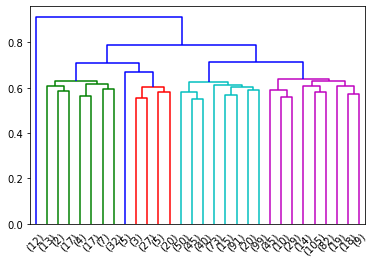

In [140]:
dend = dendrogram(Z, truncate_mode='lastp')

In [167]:
labels = fcluster(Z, 5, criterion='maxclust')
pd.Series(labels).value_counts()

4    433
5    331
2     92
3     60
1     12
dtype: int64

In [154]:
largest = pd.Series(labels).value_counts().index[1]

In [156]:
largest_size = (labels == largest).sum()
largest_size

331

In [161]:
df.loc[:, 'labels'] = labels

In [162]:
df_dummy.loc[:, 'labels'] = labels

In [164]:
sex_ratio = df.query('labels=={}'.format(largest)).loc[:, 'What is your gender?'].value_counts() / largest_size
sex_ratio

Male      0.945619
Female    0.054381
Name: What is your gender?, dtype: float64

In [49]:
df.loc[:,'label'] = label
for i, group in df.groupby('label'):
  print('=' * 10)
  print('cluster {}'.format(i))
  print(group)

cluster 1
    Do you typically check a daily weather report?  ... label
7                                              Yes  ...     1
12                                              No  ...     1
24                                              No  ...     1
74                                             Yes  ...     1
406                                            Yes  ...     1
407                                            Yes  ...     1
542                                            Yes  ...     1
569                                             No  ...     1
576                                            Yes  ...     1
879                                             No  ...     1
926                                             No  ...     1
927                                            Yes  ...     1

[12 rows x 8 columns]
cluster 2
    Do you typically check a daily weather report?  ... label
19                                              No  ...     2
85                         

In [50]:
df[(df['What is your gender?'] == 'Male') & (df['label'] == 53)].shape

(313, 8)

## DBSCAN

Возможно вы уже успели заметить, что часть респондентов практически не отвечали на заданные вопросы - то есть в соответствующих графах стоит символ "-". "Молчунами" будем называть участников опроса, которые не ответили ни на один вопрос. Таких респондентов можно сразу исключить из дальнейших исследований.

* Переберите значение параметра `eps` в интервале [0.1, 1] с шагом 0.1
* Остальные параметрамы установите следующим образом `min_samples=20`, `metric='cosine'`
* В переменную `answer3` запишите значение `eps` (c точностью до **сотых**) при котором алгоритм выделит всех "молчунов" в отдельный кластер с выбросами

In [51]:
from sklearn.cluster import DBSCAN

### *РЕШЕНИЕ*

In [137]:
dbscan = DBSCAN(eps=0.6, min_samples=20, metric='cosine')
dbscan.fit(X)


DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='cosine',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [138]:
labels = dbscan.labels_


In [139]:
pd.Series(labels).value_counts()

0    928
dtype: int64

# Строка с ответами

In [ ]:
print('kmeans {:.2f}\nagg {:.2f}\ndbscan {:.2f}'.format(answer1, answer2, answer3))